<a href="https://colab.research.google.com/github/fovi-llc/trading_evolved/blob/main/Chapter%207%20-%20Backtesting%20Trading%20Strategies/First%20Zipline%20Backtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### First Zipline Backtest

This is the "Hello World" of Zipline backtests from the book ***Trading Evolved***  by Andreas F. Clenow (https://www.followingthetrend.com/trading-evolved/).  These Google Colab installation preliminaries are by [Jim White](https://www.linkedin.com/in/jamespaulwhite/) and the notebook is in GitHub at [https://github.com/fovi-llc/trading_evolved/Chapter 7 - Backtesting Trading Strategies/First Zipline Backtest.ipynb](https://github.com/fovi-llc/trading_evolved/blob/main/Chapter%207%20-%20Backtesting%20Trading%20Strategies/First%20Zipline%20Backtest.ipynb).  That is code from Clenow's book packaged by Ahmed Aboumalwa at https://github.com/ahmedengu/trading_evolved with updates from https://github.com/RiseT/trading_evolved.

### Build TA-Lib

Colab doesn't have the C/C++ TA-Lib (https://ta-lib.org/) library installed so we have to build it. This takes a while so we'll put it in the Google Drive so we can use the intermediate build artifacts when running this notebook again. Of course if the Linux environment changes then that will need to be deleted and rebuilt.

Linux shell and build scripts don't like there to be spaces (or other "special") characters in paths so Colab plays tricks to hide the space in "My Drive". We want that to work for us otherwise the ta-lib makefile install will fail.

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')

if not os.environ.get("MY_WORKSPACE"):
  os.environ["MY_WORKSPACE"] = "/content/drive/MyDrive/Workspace"

%mkdir -p /content/drive/MyDrive/Workspace
%cd /content/drive/MyDrive/Workspace
!pwd

Mounted at /content/drive
/content/drive/MyDrive/Workspace
/content/drive/MyDrive/Workspace


A shell script to build the TA-Lib C/C++ library based on this [https://github.com/TA-Lib/ta-lib-python/issues/590#issuecomment-1534248996](https://github.com/TA-Lib/ta-lib-python/issues/590#issuecomment-1534248996).

In [2]:
%%bash

pwd
if [ -d ta-lib ]; then
  echo "ta-lib directory exists."
else
  wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
  tar -xzf ta-lib-0.4.0-src.tar.gz
fi
cd ta-lib
./configure --prefix=/usr
make
make install

/content/drive/MyDrive/Workspace
checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /usr/bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking for gcc... gcc
checking for C compiler default output file name... a.out
checking whether the C compiler works... yes
checking whether we are cross compiling... no
checking for suffix of executables... 
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking for style of include used by make... GNU
checking dependency style of gcc... gcc3
checking build system type... x86_64-unknown-linux-gnu
checking host system type... x86_64-unknown-linux-gnu
checking for a sed that does not truncate output... /usr/bin/sed
checking for grep that handles long l

--2024-09-22 04:22:17--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-09-22 04:22:18--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://netactuate.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-09-22 04:22:18--  http://netactuate.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1
Res

An alternative way to run those commands from [https://stackoverflow.com/questions/49648391/how-to-install-ta-lib-in-google-colab](https://stackoverflow.com/questions/49648391/how-to-install-ta-lib-in-google-colab).

### `pip zipline-reload`

[Quantopian Zipline](https://github.com/quantopian/zipline) is no longer maintained, but **Stefan Jansen** (https://www.ml4trading.io/) author of the comprehensive (and recommended) book ***Machine Learning for Trading*** which also uses Zipline, has "reloaded" it and the dependencies that also became unsupported after the book was published.  Code for Stefan's book is at https://github.com/stefan-jansen/machine-learning-for-trading and the reloaded Python packages (`zipline-reloaded`, `bcolz-zipline`, `pyfolio-reloaded`, `empyrical-reloaded`, and `alphalens-reloaded`) are here: https://github.com/stefan-jansen?tab=repositories.

These version conditions are to deal with incompatibilty problems that the move to Numpy 2 cause (https://github.com/stefan-jansen/bcolz-zipline/issues/61).  If you're doing this in the future then hopefully the conditions can be omitted.  Also if you can accept the incompatibilties that other of the Colab PyPi packages have with `numpy>2` then go ahead.

In [3]:
!pip install "zipline-reloaded==3.0.4" "bcolz-zipline==1.2.9" "numpy<2"

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 368.5/368.5 kB 10.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 48.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 90.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.0 MB/s eta 0:00:00
  Created

### Data Ingestion

To run a Zipline backtest you first need to "ingest" (load) a data bundle.  The default bundle included in Zipline is Quandl.  Quandl is no longer active and the data is not updated anymore, but the dataset (https://data.nasdaq.com/databases/WIKIP) covers the period 1996-01-01 thru 2018-03-27 and is available with a free API key from [https://data.nasdaq.com/](https://data.nasdaq.com/).

I recommend using Colab secrets for your API key and naming it `QUANDL_API_KEY`. Also, in order to avoid repeatedly ingesting the data I recommend linking Google Drive and setting the `ZIPLINE_ROOT` env var to a folder there.

Of course if you're running this locally then you can just use the command line in the usual fashion.

In [7]:
from google.colab import userdata
import os

if not os.environ.get("QUANDL_API_KEY"):
  os.environ["QUANDL_API_KEY"] = userdata.get("QUANDL_API_KEY")

if not os.environ.get("ZIPLINE_ROOT"):
  os.environ["ZIPLINE_ROOT"] = os.path.join(os.environ["MY_WORKSPACE"], "zipline")


### List Bundle Ingestions

Before running the Zipline ingest command lets see if you're already done that because every time you run the command it will just add it again, even if you've done it before (because it assumes the data source regularly updates and doesn't know that Quandl is now moribund).

In [5]:
%%bash

export ZIPLINE_ROOT="$ZIPLINE_ROOT"
echo $ZIPLINE_ROOT
zipline bundles

/content/drive/MyDrive/Workspace/zipline
csvdir <no ingestions>
quandl 2024-09-22 03:03:55.920019
quantopian-quandl <no ingestions>


### Ingest the Quandl Bundle (Once!)

So if that shows no quandl data bundle ingestions then we should do that now. You can also come back a rerun the cell above to see the updated list of bundles, it should list one with a date and timestamp.

In [ ]:
%%bash

export QUANDL_API_KEY="$QUANDL_API_KEY"
export ZIPLINE_ROOT="$ZIPLINE_ROOT"

zipline ingest -b quandl

Merging daily equity files:


[2024-09-22T02:31:16+0000-INFO][zipline.data.bundles.core]
 Ingesting quandl
[2024-09-22T02:31:16+0000-INFO][zipline.data.bundles.quandl]
[2024-09-22T02:31:25+0000-INFO][zipline.data.bundles.quandl]
 Parsing raw data.
[2024-09-22T02:32:11+0000-INFO][zipline.data.bundles.quandl]
 Generating asset metadata.
/usr/local/lib/python3.10/dist-packages/zipline/data/bundles/quandl.py:106: FutureWarning: The provided callable <function min at 0x785e7c98bd90> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  data = data.groupby(by="symbol").agg({"date": [np.min, np.max]})
/usr/local/lib/python3.10/dist-packages/zipline/data/bundles/quandl.py:106: FutureWarning: The provided callable <function max at 0x785e7c98bc70> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" ins

### Run the Backtest!

At last we can run the backtest!  Note that the `end_date` of 2018-03-28 is because the last day in the old Quandl WIKIP dataset is 2018-03-27 and we just get errors on the 28th and beyond.  Of course getting an up-to-date data bundle is the cure for this.

/usr/local/lib/python3.10/dist-packages/zipline/finance/ledger.py:424: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self.daily_returns_series[session_ix] = self.todays_returns


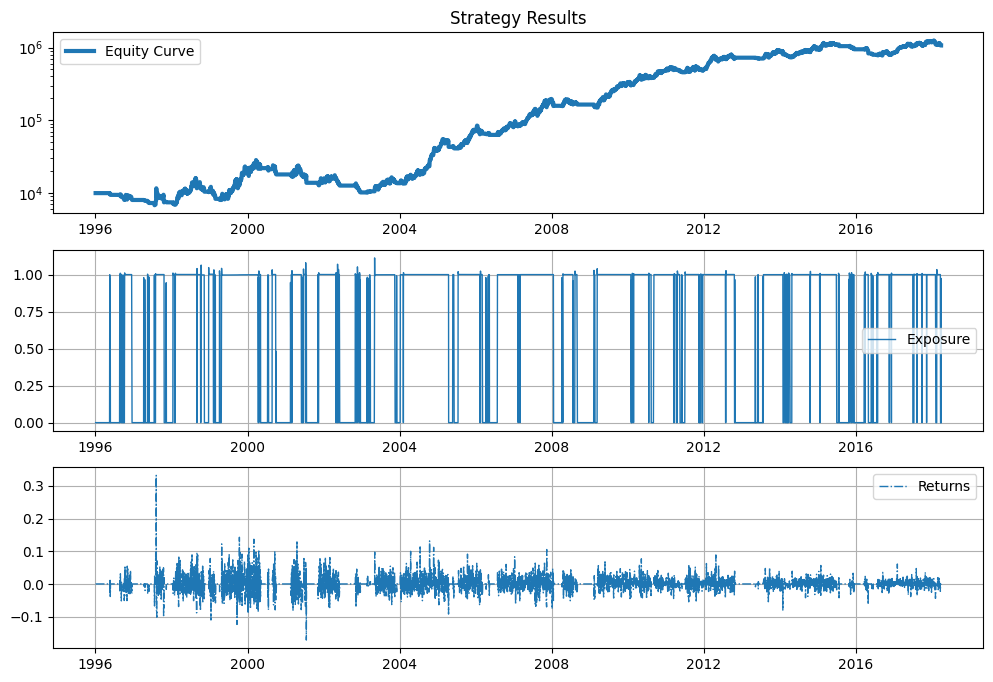

In [6]:
# This ensures that our graphs will be shown properly in the notebook.
%matplotlib inline

# Import Zipline functions that we need
from zipline import run_algorithm
from zipline.api import order_target_percent, symbol

# Import visualization
import matplotlib.pyplot as plt

# Import Pandas
import pandas as pd


def initialize(context):
    # Which stock to trade
    context.stock = symbol("AAPL")

    # Moving average window
    context.index_average_window = 100


def handle_data(context, data):
    # Request history for the stock
    equities_hist = data.history(
        context.stock, "close", context.index_average_window, "1d"
    )

    # Check if price is above moving average
    if equities_hist.iloc[-1] > equities_hist.mean():
        stock_weight = 1.0
    else:
        stock_weight = 0.0

    # Place order
    order_target_percent(context.stock, stock_weight)


def analyze(context, perf):
    fig = plt.figure(figsize=(12, 8))

    # First chart
    ax = fig.add_subplot(311)
    ax.set_title("Strategy Results")
    ax.semilogy(
        perf["portfolio_value"], linestyle="-", label="Equity Curve", linewidth=3.0
    )
    ax.legend()
    ax.grid(False)

    # Second chart
    ax = fig.add_subplot(312)
    ax.plot(perf["gross_leverage"], label="Exposure", linestyle="-", linewidth=1.0)
    ax.legend()
    ax.grid(True)

    # Third chart
    ax = fig.add_subplot(313)
    ax.plot(perf["returns"], label="Returns", linestyle="-.", linewidth=1.0)
    ax.legend()
    ax.grid(True)


# Set start and end date
start_date = pd.Timestamp("1996-01-01")
end_date = pd.Timestamp("2018-03-28")

# Fire off the backtest
results = run_algorithm(
    start=start_date,
    end=end_date,
    initialize=initialize,
    analyze=analyze,
    handle_data=handle_data,
    capital_base=10000,
    data_frequency="daily",
    bundle="quandl",
)